# MLP for images with Keras

In this notebook I will show you how to build and train a MLP for image classification and regression usign MNIST dataset.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt 

%matplotlib inline

## Load the data

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f'x_train.shape = {x_train.shape} - y_train.shape = {y_train.shape}')
print(f'x_test.shape = {x_test.shape} - y_test.shape = {y_test.shape}')

11501568/11490434 [==============================] - 0s 0us/step
x_train.shape = (60000, 28, 28) - y_train.shape = (60000,)
x_test.shape = (10000, 28, 28) - y_test.shape = (10000,)


In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Feature Engineering

In [ ]:
# It's common to use MinMax(0,1) normalization for images
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255

# We can feed our MLP with squared images, we must flatten them first
x_train = x_train.reshape(len(x_train), -1)
x_test = x_test.reshape(len(x_test), -1)
print(f'New x_train.shape: {x_train.shape}')
print(f'New x_test.shape: {x_test.shape}')


New x_train.shape: (60000, 784)
New x_test.shape: (10000, 784)


In [ ]:
x_train[0].shape

(784,)

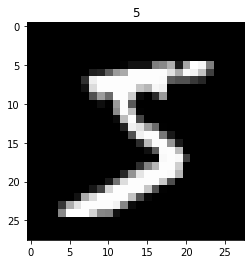

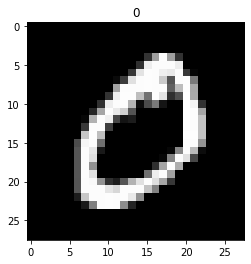

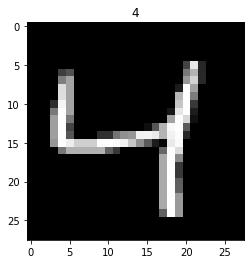

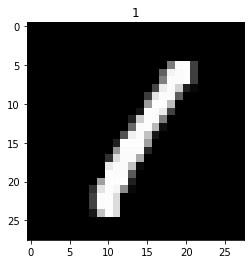

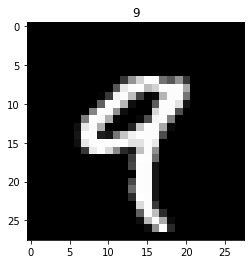

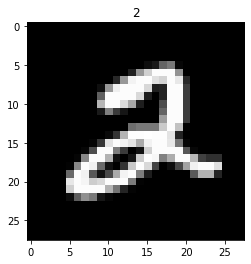

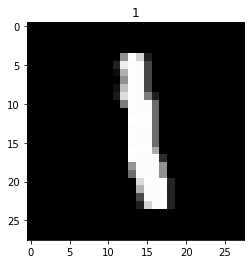

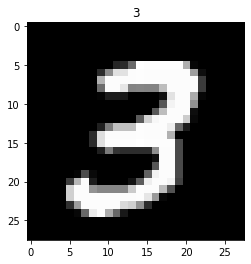

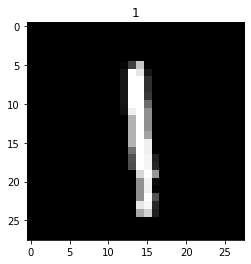

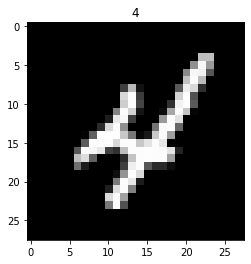

In [ ]:
# Let's visualize some images
plt.gray()
for i in range(10):
    plt.imshow(x_train[i].reshape(28, 28))
    plt.title(y_train[i])
    plt.show()

## Building the model

It will have:

    - 2 hidden layers with 16 neurons each
    - 1 output layer with 10 neurons (1 for each class)
    - Batch size of 32 during training


In [ ]:
input_shape = x_train[0].shape

# Build the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(16, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(10, activation='softmax')
    ]
)

# Now we must copile it
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

print('Summary:')
model.summary()

Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [ ]:
print("\nTraining...")
history = model.fit(
    x=x_train, 
    y=y_train, 
    validation_split=0.2,
    epochs=15, 
    batch_size=32,
    callbacks=[
      keras.callbacks.EarlyStopping(patience=2),
    ]
)


Training...
Epoch 1/15
1500/1500 [==============================] - 7s 3ms/step - loss: 0.6110 - accuracy: 0.8141 - val_loss: 0.2806 - val_accuracy: 0.9177
Epoch 2/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3362 - accuracy: 0.9029 - val_loss: 0.2382 - val_accuracy: 0.9304
Epoch 3/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2925 - accuracy: 0.9140 - val_loss: 0.2193 - val_accuracy: 0.9378
Epoch 4/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2696 - accuracy: 0.9202 - val_loss: 0.2054 - val_accuracy: 0.9399
Epoch 5/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2485 - accuracy: 0.9268 - val_loss: 0.2066 - val_accuracy: 0.9413
Epoch 6/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2349 - accuracy: 0.9309 - val_loss: 0.1955 - val_accuracy: 0.9435
Epoch 7/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2216 - accuracy: 0.9327 - val_loss: 0.1945 - 

### Let's see some plots

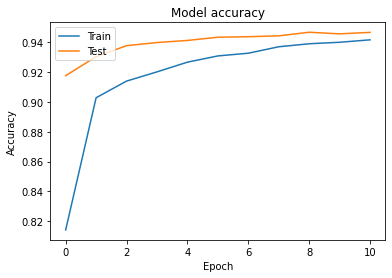

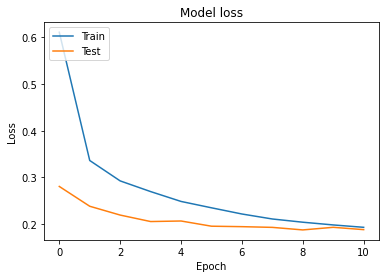

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Using the model


In [ ]:
x_test[0].shape

(784,)

In [ ]:
x_test[0].reshape(1, -1).shape

(1, 784)

In [ ]:
prediction = model.predict(x_test[0].reshape(1, -1))
prediction

array([[1.3590343e-06, 2.2549734e-06, 2.9436706e-05, 2.1903874e-05,
        2.6330078e-09, 1.7657541e-08, 8.2161628e-15, 9.9994409e-01,
        3.9408643e-08, 9.5990674e-07]], dtype=float32)

In [ ]:
pred_class = prediction.argmax(axis=1)[0]
pred_class

7

In [ ]:
prediction[0][pred_class]

0.9999441

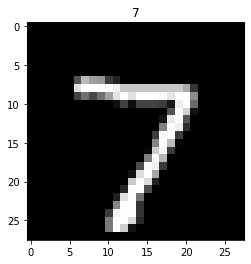

In [ ]:
plt.imshow(x_test[0].reshape(28, 28))
plt.title(y_test[0])
plt.show()

Evaluate the model on all the testing set, never used yet

In [ ]:
# Predict over test
y_test_pred = model.predict(x_test)

# Get predicted class from probabilities
y_test_pred_cat = y_test_pred.argmax(axis=1)

# Evaluamos el accuracy score
accuracy_score(y_true=y_test, y_pred=y_test_pred_cat)

0.9454

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred_cat))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.99      0.97      0.98      1135
           2       0.91      0.95      0.93      1032
           3       0.93      0.92      0.93      1010
           4       0.94      0.96      0.95       982
           5       0.92      0.92      0.92       892
           6       0.96      0.96      0.96       958
           7       0.95      0.95      0.95      1028
           8       0.94      0.91      0.93       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.95      0.95      0.95     10000



---

# MLP for regression

Let's now think this problem as a regression. We will predict one number between 0 and 9 instead a of class.


In [ ]:
# Input shape will be the same
input_shape = x_train[0].shape

# Output shape now is different!
# Note: Activation function in the output layer
# can't be softmax in this case
num_classes = 1

# Define the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(16, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(num_classes, activation='linear')
    ]
)

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

print('Summary:')
model.summary()


Summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                12560     
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,849
Trainable params: 12,849
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print("\nTraining...")
history = model.fit(
    x=x_train, 
    y=y_train, 
    validation_split=0.2, 
    epochs=15, 
    batch_size=32,
)



Training...
Epoch 1/15
1500/1500 [==============================] - 4s 3ms/step - loss: 3.1467 - mae: 1.2987 - val_loss: 1.8138 - val_mae: 0.9656
Epoch 2/15
1500/1500 [==============================] - 4s 2ms/step - loss: 1.6467 - mae: 0.8971 - val_loss: 1.4500 - val_mae: 0.8193
Epoch 3/15
1500/1500 [==============================] - 4s 2ms/step - loss: 1.3568 - mae: 0.7902 - val_loss: 1.3015 - val_mae: 0.7636
Epoch 4/15
1500/1500 [==============================] - 4s 2ms/step - loss: 1.2184 - mae: 0.7377 - val_loss: 1.2725 - val_mae: 0.7369
Epoch 5/15
1500/1500 [==============================] - 4s 2ms/step - loss: 1.1176 - mae: 0.7008 - val_loss: 1.1103 - val_mae: 0.6849
Epoch 6/15
1500/1500 [==============================] - 6s 4ms/step - loss: 1.0146 - mae: 0.6630 - val_loss: 1.0572 - val_mae: 0.6633
Epoch 7/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.9379 - mae: 0.6342 - val_loss: 1.0281 - val_mae: 0.6512
Epoch 8/15
1500/1500 [===========================

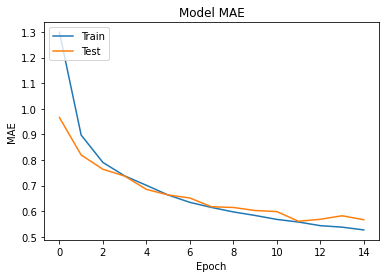

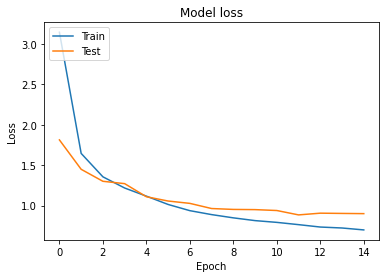

In [ ]:
# Plot training & validation MAE values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
prediction = model.predict(x_test[1].reshape(1, -1))
prediction

array([[2.3657157]], dtype=float32)

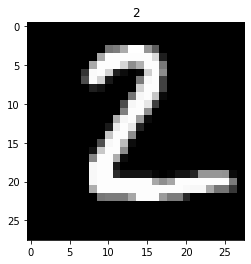

In [ ]:
plt.imshow(x_test[1].reshape(28, 28))
plt.title(y_test[1])
plt.show()